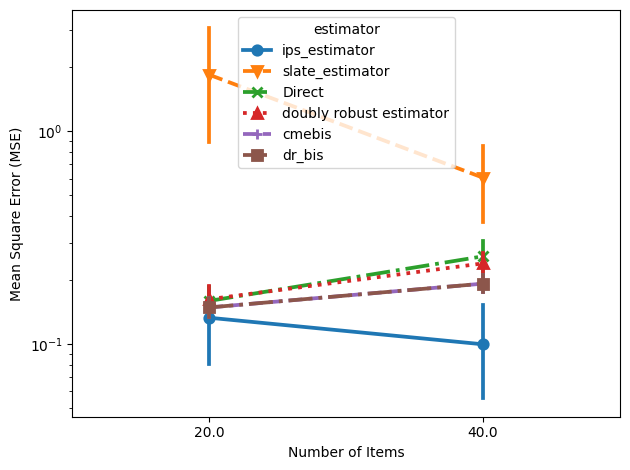

In [18]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
import glob
import os

from scipy.stats.mstats import winsorize

# plt.switch_backend('agg')

def winsorized_std(data, percentile):
    std = np.std(winsorize(data, (0, percentile)).data)
    return std

def winsorized_mean(data, percentile):
    mean = np.mean(winsorize(data, (0, percentile)).data)
    return mean

# combine the result files
df_list = [pd.read_csv(filename) for filename in glob.glob(os.path.join('item_size_report/results','*.csv'))]

prelim_result = pd.concat(df_list)
prelim_result.sort_values(by=['num_items'], ascending=True)

prelim_result = prelim_result[[c for c in prelim_result.columns if 'error' in c] + ['num_items']]
prelim_result.columns = prelim_result.columns.str.replace("_square_error", "")

estimator_cols = list(filter(lambda x: 'estimator' in x, prelim_result))

# compute the statistics and plot the results
winsorized_df = pd.DataFrame()
for cond, cond_df in prelim_result.groupby("num_items"):
    for e in estimator_cols:
        cond_df[e] = winsorize(cond_df[e], (0, 0.1))

    cond_df["num_items"] = cond
    # winsorized_df = winsorized_df.append(cond_df)
    winsorized_df = pd.concat([winsorized_df, cond_df], ignore_index=True)

# prelim_result = prelim_result.query("multiplier < -0.2")
final_df = pd.melt(winsorized_df, id_vars=["num_items"], var_name="estimator", value_name="MSE")

# plot the results
ax = sns.pointplot(x="num_items", y="MSE", hue="estimator", data=final_df,
                   linestyles=["-", "--","-.",":",'dashed', "-."], markers=['o','v','x','^','+', 's'])

ax.set_yscale('log')
ax.set_ylabel("Mean Square Error (MSE)")
ax.set_xlabel('Number of Items')

xticks = ['%0.1f' % x for x in np.unique(final_df['num_items'])]
ax.xaxis.set_major_locator(plt.FixedLocator(range(len(xticks))))
ax.xaxis.set_major_formatter(ticker.FixedFormatter(xticks))

leg_handles = ax.get_legend_handles_labels()[0]
# ax.legend(leg_handles, ['CME', 'Direct', 'DR', 'Slate', 'IPS'], title='Estimator')

plt.tight_layout()

plt.savefig('plots/item_size_result.pdf')
plt.show()

In [17]:
final_df.loc[(final_df["estimator"] == "dr_bis") & (final_df["num_items"] == 40), "MSE"].mean(), final_df.loc[(final_df["estimator"] == "cmebis") & (final_df["num_items"] == 40), "MSE"].mean(), final_df.loc[(final_df["estimator"] == "slate_estimator") & (final_df["num_items"] == 40), "MSE"].mean(), final_df.loc[(final_df["estimator"] == "ips_estimator") & (final_df["num_items"] == 40), "MSE"].mean()

(0.19247013629127024,
 0.1924701394621454,
 0.6051291442569368,
 0.09982870827947704)

In [14]:
final_df["estimator"].unique()

array(['ips_estimator', 'slate_estimator', 'Direct',
       'doubly robust estimator', 'cmebis', 'dr_bis'], dtype=object)

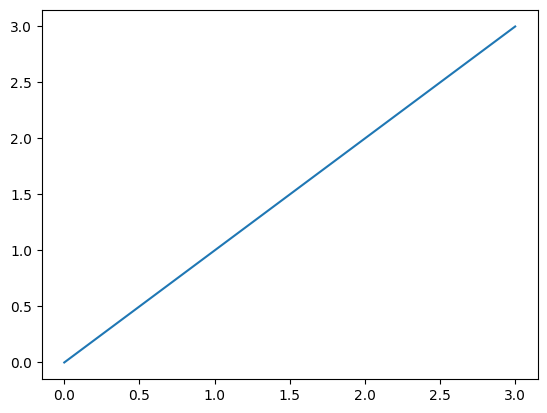

In [1]:
import matplotlib.pyplot as plt
plt.plot([0, 1, 2, 3])
plt.show()